In [1]:
from typing import Union
from datetime import datetime, timedelta
import warnings

import numpy as np
import pandas as pd
from scipy import signal
from scipy.ndimage import gaussian_filter
import sklearn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import torch
import torch.nn.functional as F
import cv2

from src import helper, dasly

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Campus_test_20230628/',
    start='20230628 112130',
    # end='20230628 103115',
    duration=60
)

Welcome to Dasly!
7 files, from 112129 to 112229


In [3]:
das.reset()

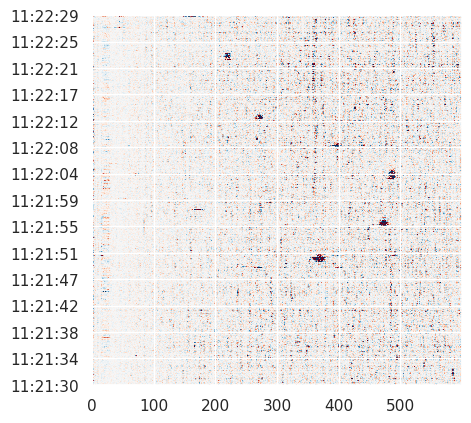

In [4]:
das.heatmap(vmin=-3.14e+05, vmax=3.14e+05)

In [20]:
das.reset()
das.low_pass_filter(cutoff_freq=200, nyq_freq=0.5/(1/2000), axis=0)
das.high_pass_filter(cutoff_freq=1, nyq_freq=0.5/(1/2000), axis=0)
das.decimate(dt=1/2000, dt_out=1/2000*64, axis=0)

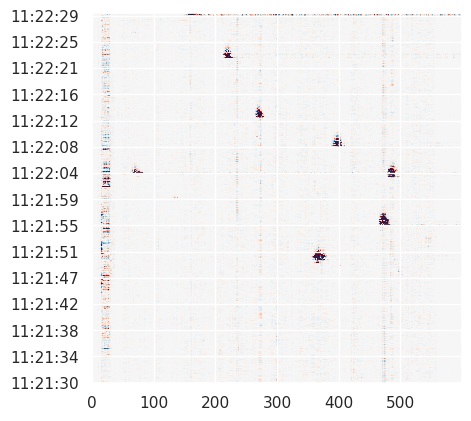

In [21]:
das.heatmap(vmin=-1.14e+05, vmax=1.14e+05)

Heatmap with vmin 0, vmax 9.9e+03


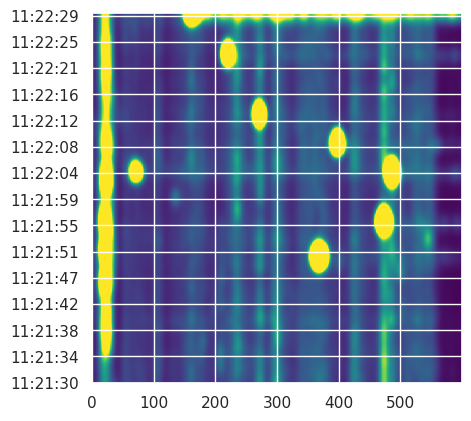

In [22]:
das.gauss_filter(beta=5, beta_alpha_factor=5)
das.heatmap()

In [27]:
das.binary_filter()
das.heatmap()

Threshold nan
Heatmap with vmin -0, vmax 0


ValueError: vmin, vcenter, and vmax must be in ascending order

In [28]:
das.detect_events(eps=2, min_samples=6)
das.heatmap()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by DBSCAN.

In [10]:
das.sampling_rate

31.25

In [11]:
1875/60

31.25